<a href="https://colab.research.google.com/github/hs0224/a-professor-student-research-club/blob/chanwoo/chanwoo/MNIST_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [4]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [5]:
(path/'valid').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/valid/3'),Path('/root/.fastai/data/mnist_sample/valid/7')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [7]:
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [23]:
im3_path = threes[5]
im3 = Image.open(im3_path)
im3

이미지를 배열로 변환

In [24]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  75, 105, 245, 253, 253,
        255, 129,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  62, 239, 252, 252, 252, 252,
        253, 252, 223, 138,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 162, 252, 252, 252, 252, 252,
        253, 252, 252, 252, 126,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

이미지를 파이토치 탠서로 변환

In [25]:
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  75, 105, 245, 253, 253, 255,
         129,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  62, 239, 252, 252, 252, 252, 253,
         252, 223, 138,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 162, 252, 252, 252, 252, 252, 253,
         252, 252, 252, 126,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  4

In [26]:
import pandas as pd

이쁘게 오랜지색으로~

In [27]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'front-size':'6pt'}).background_gradient('Oranges')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,75,105,245,253,253,255,129,37,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,62,239,252,252,252,252,253,252,223,138,7,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,162,252,252,252,252,252,253,252,252,252,126,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,40,217,252,139,132,132,133,160,252,252,212,35,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,38,99,2,0,0,0,7,173,252,252,205,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,157,252,222,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,252,222,0,0,0,0,0,0,0,0,0


In [30]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
print(len(three_tensors),len(seven_tensors))

6131 6265


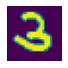

In [33]:
show_image(three_tensors[5])

이미지들을 쌓아 3차원 텐서 이미지로 변환

In [34]:
stacked_sevnes = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

shape 속성 길이 => 랭크 => 텐서 차원 또는 축의 개수

In [35]:
len(stacked_threes.shape)

3

ndim 속성 => 텐서의 랭크 확인

In [36]:
stacked_threes.ndim

3

0번째 차원 이미지 텐서 평균내기

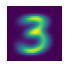

In [41]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

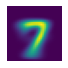

In [42]:
mean7 = stacked_sevnes.mean(0)
show_image(mean7)

이상적인 숫자들과의 걸를 측정하기 위한 숫자 고르기

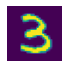

In [47]:
a_3 = stacked_threes[6100]
show_image(a_3)

(L1노름)평균절대차 - 차이의 절대값의 평균 구하기

In [49]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_abs

tensor(0.1224)

(L2노름)평균제곱근오차 - 차이의 제곱에 대한 평균의 제곱근 ==> 실수에 더 강한 패널티 부여

In [50]:
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_sqr

tensor(0.2192)

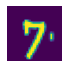

In [51]:
a_7 = stacked_sevnes[5100]
show_image(a_7)

In [52]:
dist_7_abs = (a_7 - mean7).abs().mean()
dist_7_sqr = ((a_7 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.0965), tensor(0.1903))

 l1 = 절대평균값 / MSE = 평균제곱오차

In [55]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1863), tensor(0.3408))

검증용 데이터 만들기 및 확인

> 3 - 28x28사이즈 1010장

> 7 - 28x28사이즈 1028장





In [58]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
print(valid_3_tens.shape,valid_7_tens.shape)

torch.Size([1010, 28, 28]) torch.Size([1028, 28, 28])


평균절대 오차 계산 함수
---
(-1,-2) => 축의 범위 여기서는 (가로,세로)

In [70]:
def mnist_distance(a,b):
  return (a-b).abs().mean((-1, -2))

평균 제곱근 오차 계산 함수

In [69]:
def mnist_distance_sqrt(a,b):
  return ((a-b)**2).mean((-1, -2)).sqrt()

In [72]:
mnist_distance(a_3,mean3)

tensor(0.1224)

In [86]:
mnist_distance(a_3,mean7)

tensor(0.1863)

In [85]:
mnist_distance_sqrt(a_3,mean3)

tensor(0.2192)

In [73]:
 valid_3_dist = mnist_distance(valid_3_tens,mean3)
 valid_3_dist, valid_3_dist.shape

(tensor([0.1190, 0.1191, 0.1368,  ..., 0.1183, 0.1301, 0.1152]),
 torch.Size([1010]))

is_3 함수에 a_3를 넣을 시 평균 절대 오차가
mean7보다 mean3일 때 더 작으므로 True가 나오게 되고 a_7을 넣으면 False가 나오게된다.

In [74]:
def is_3(x):
  return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [75]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [82]:
is_3(a_7), is_3(a_7).float()

(tensor(False), tensor(0.))

In [78]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [87]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [81]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])